In [1]:
import sys
sys.path.insert(0,'C:\\code\\python_for_the_financial_economist\\')

"""
Magic commands
"""

%load_ext autoreload
%autoreload 2

"""
Load relevant packages
"""

import numpy as np
import pandas as pd

# plotting 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import animation, cm
import seaborn as sns

# working with time 
import datetime
from scipy import stats
from scipy import optimize

# pandas data reader for downloading data
from pandas_datareader.data import DataReader
from pandas_datareader.famafrench import FamaFrenchReader, get_available_datasets

# for typehints 
from typing import Union, List

"""
Own packages
"""

# function for downloading yield data from FRED 
from codelib.dal.fred_yield_data import get_nominal_yield_data

# some tailormade plots 
from codelib.visualization.base import correlation_plot

# Default plotting layout
from codelib.visualization.layout import DefaultStyle
DefaultStyle();

# Exercises - Week 5

In this week we will look at a few exercises involving minimization and maximization. 

## Problem 1: Second order conditions

In this problem, we will look at the [second derivative test](https://en.wikipedia.org/wiki/Second_partial_derivative_test) for determining whether a critical point is a local minimum or maximum. 

Consider the function 

$$
f(x,y,z) = -x^2 - y^2 - z^2
$$

__Question 1__

What are the first order partial derivatives? Find the stationary/critical point. Also maximize the function using `scipy.optimize.minimize`. 

__Question 2__

What are the second order partial derivatives? Write up the Hessian. 

__Question 3__

The properties of the Hessian matrix are important for determining whether the critical point / stationary point is a maximum, minimum or neither of the two. 

* If the Hessian is negative definite, then the stationary point is a local maximum
* If the Hessian is positive definite, then the stationary point is a local minimum
* If the Hessian is indefinite, then the stationary point is a a saddle point

Otherwise, the test is inconclusive. 

We need to remember that a [definite matrix](https://en.wikipedia.org/wiki/Definite_matrix) can be defined in the following way. A  symmetric matrix, $\mathbf{A}$, is said to be positive definite if for every vector $\mathbf{v} \neq \mathbf{0}$

$$
\mathbf{v}^\top  \mathbf{A} \mathbf{v} > 0
$$

and negative definite if 

$$
\mathbf{v}^\top  \mathbf{A} \mathbf{v} < 0
$$
For semi-definiteness replace $>$ and $<$ with respectively $\geq$ and $\leq$. 


Is the matrix negative definite?

__Question 4__

For a symmetric, positive definite matrix then the above definition will be equivalnt to all the eigenvalues being positive. For a negative definite matrix then all the eigenvalues will be negative. 

Find the eigenvalues (use e.g. `numpy.linalg.eigvals`).

__Question 5__

Will the stationary point be a minimum or maximum?

__Question 6__

Assume now that $f(x,y,z) = -x^2 + y^2 - z^2$. Will this function also have a maximum at $(x,y,z) = (0, 0, 0)$?

__Question 7__

Define a function that checks if a symmetric matrix is negative definite. 



### Solution

__Question 1__

The first order partial derivatives are given by

\begin{eqnarray}
f_x^\prime(x,y,z) &=& -2x \nonumber \\
f_y^\prime(x,y,z) &=& -2y \nonumber  \\
f_z^\prime(x,y,z) &=& -2z \nonumber  
\end{eqnarray}

The only solution to the three equations obtained by setting the partial derivatives equal to zero is $(x, y, z) = (0,0,0)$



In [2]:
func_prob1 = lambda x: -x[0]**2 - x[1]**2 - x[2]**2

# remember that we want to maximize
res = optimize.minimize(lambda x: -func_prob1(x), [1,2,-1])
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3.2847621921537123e-15
        x: [-4.673e-08 -2.118e-08 -2.555e-08]
      nit: 2
      jac: [-7.855e-08 -2.745e-08 -3.620e-08]
 hess_inv: [[ 9.167e-01 -1.667e-01  8.333e-02]
            [-1.667e-01  6.667e-01  1.667e-01]
            [ 8.333e-02  1.667e-01  9.167e-01]]
     nfev: 12
     njev: 3

__Question 2__

The second order partial derivatives are given by 

\begin{eqnarray}
f_{xx}^{\prime\prime}(x,y,z) &=& -2 \nonumber \\
f_{yy}^{\prime\prime}(x,y,z) &=& -2 \nonumber  \\
f_{zz}^{\prime\prime}(x,y,z) &=& -2 \nonumber \\
f_{xy}^{\prime\prime}(x,y,z) &=& 0 \nonumber \\
f_{xz}^{\prime\prime}(x,y,z) &=& 0 \nonumber \\
f_{yz}^{\prime\prime}(x,y,z) &=& 0 \nonumber \\
\end{eqnarray}

The Hessian is therefore
$$
H(x,y,z) = \begin{bmatrix}
-2 & 0 & 0 \\
0 & -2 & 0 \\
0 & 0 & -2
\end{bmatrix}
$$

__Question 3__


If the Hessian matrix is negative definite, then the quadratic form 

$$
\mathbf{v}^\top \mathbf{H} \mathbf{v} = -2v_1^2 - 2v_2^2 -2 v_3^2
$$

should be negative for all $\mathbf{v} \neq \mathbf{0}$. Since $v_1^2, v_2^2, v_3^2$ always will be positive, then the quadratic form will always be negative. 

__Question 4__

The eigenvalues will solve 

$$
\det \left(\mathbf{H} - \lambda \mathbf{I} \right) = \det \begin{bmatrix}
-2 - \lambda & 0 & 0 \\
0 & -2  - \lambda & 0 \\
0 & 0 & -2 - \lambda
\end{bmatrix} = (-2 - \lambda)(-2 - \lambda)(-2 - \lambda) = 0
$$

Thus, all eigenvalues must be equal to $\lambda = -2$. 

This is in agreement with the results from the previous problem. Having all negative eigenvalues corresponds to the matrix under consideration being negative definite. 

In [3]:
hess_mat = np.diag(np.ones(3) * -2)

np.linalg.eigvals(hess_mat)

array([-2., -2., -2.])

__Question 5__

The stationary point will be a (global) maximum since the Hessian is negative definite

__Question 6__

Again, we will have

$$
\begin{eqnarray}
f_x^\prime(x,y,z) &=& -2x \nonumber \\
f_y^\prime(x,y,z) &=& 2y \nonumber  \\
f_z^\prime(x,y,z) &=& -2z  
\end{eqnarray}
$$

with a stationary point at $(x,y,z) = (0, 0, 0)$. 

The Hessian is 
$$
H(x,y,z) = \begin{bmatrix}
-2 & 0 & 0 \\
0 & 2 & 0 \\
0 & 0 & -2
\end{bmatrix}
$$

which will have two eigenvalues equal to $-2$ and one eigenvalue equal to $2$. The Hessian will therefore be indefinite and the stationary point will be a saddle point. 

In [4]:
hess_new_mat = np.diag([-2, 2, -2])

np.linalg.eigvals(hess_new_mat)

array([-2.,  2., -2.])

__Question 7__

In [5]:
def is_neg_def(matrix: np.array) -> bool:
    return np.all(np.linalg.eigvals(matrix) < 0)

In [6]:
is_neg_def(hess_mat)

True

In [7]:
is_neg_def(hess_new_mat)

False

## Problem 2: Minimizing distance 

Assume that Luke Skywalker is currently located at the point $A=(x,y,z)=(5, 5, 5)$ in his X-Wing Starfighter. He needs to gather critical information on the planet Endor before joining the rebel forces at the point $B=(x,y,z) = (6, 6, 6)$. The planet Endor is defined by the 3D ball

$$
x^2 + y^2 + z^2 = 1
$$

__Question 1__

What is the formula for the distance between the point $A$ and a arbitrary point on the surface of the planet $C$ and back to the point $B$? ([euclidian distance](https://en.wikipedia.org/wiki/Euclidean_distance) or [euclidian norm](https://en.wikipedia.org/wiki/Norm_(mathematics)))

__Question 2__


What is the total distance when $C = (1, 0, 0)$?

__Quesiton 3__

We want to help Luke Skywalker to find the optimal place on Endor to retrieve the information. Set up the constrained minimization problem that Luke Skywalker is facing. 

__Quesiton 4__

Solve the constrained minimization problem numerically.



### Solution 

__Question 1__

Define $C=(x,y,z)$ to be an abitrary point on the planet. Then, we calcuclate the distance between $A$ and $C$ as 

$$
\vert \vert C-A \vert \vert = \sqrt{(x-5)^2 + (y-5)^2 + (z-5)^2}
$$

and the distance between $C$ and $B$ as 

$$
\vert \vert B-C \vert \vert = \sqrt{(6-x)^2 + (6-y)^2 + (6-z)^2}
$$

Thus, the total distance will be

$$
\vert \vert C-A \vert \vert + \vert \vert B-C \vert \vert  = \sqrt{(x-5)^2 + (y-5)^2 + (z-5)^2} + \sqrt{(6-x)^2 + (6-y)^2 + (6-z)^2}
$$

__Question 2__

In [8]:
def distance_function(C):
    
    A = np.array([5, 5, 5])
    B = np.array([6, 6, 6])
    C = np.array(C) 
    
    return np.linalg.norm(C-A) + np.linalg.norm(B-C)

distance_function([1,0,0])

17.972896206432065

__Question 3__

$$
\arg \min f(x,y,z) \; \text{ s.t. } x^2 + y^2 + z^2 = 1
$$

where 

$$
f(x,y,z) = \vert \vert C-A \vert \vert + \vert \vert B-C \vert \vert 
$$

__Question 4__



In [9]:
def constraint_ball(P):
    
    return P[0]**2 + P[1]**2 + P[2]**2 - 1.0

constraint = {'type':'eq', 'fun': constraint_ball}

res = optimize.minimize(distance_function, [1, 1, 1], constraints=constraint)
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 17.052558880432905
       x: [ 5.774e-01  5.774e-01  5.774e-01]
     nit: 5
     jac: [-1.155e+00 -1.155e+00 -1.155e+00]
    nfev: 20
    njev: 5

In [10]:
distance_function(res.x)

17.052558880432905

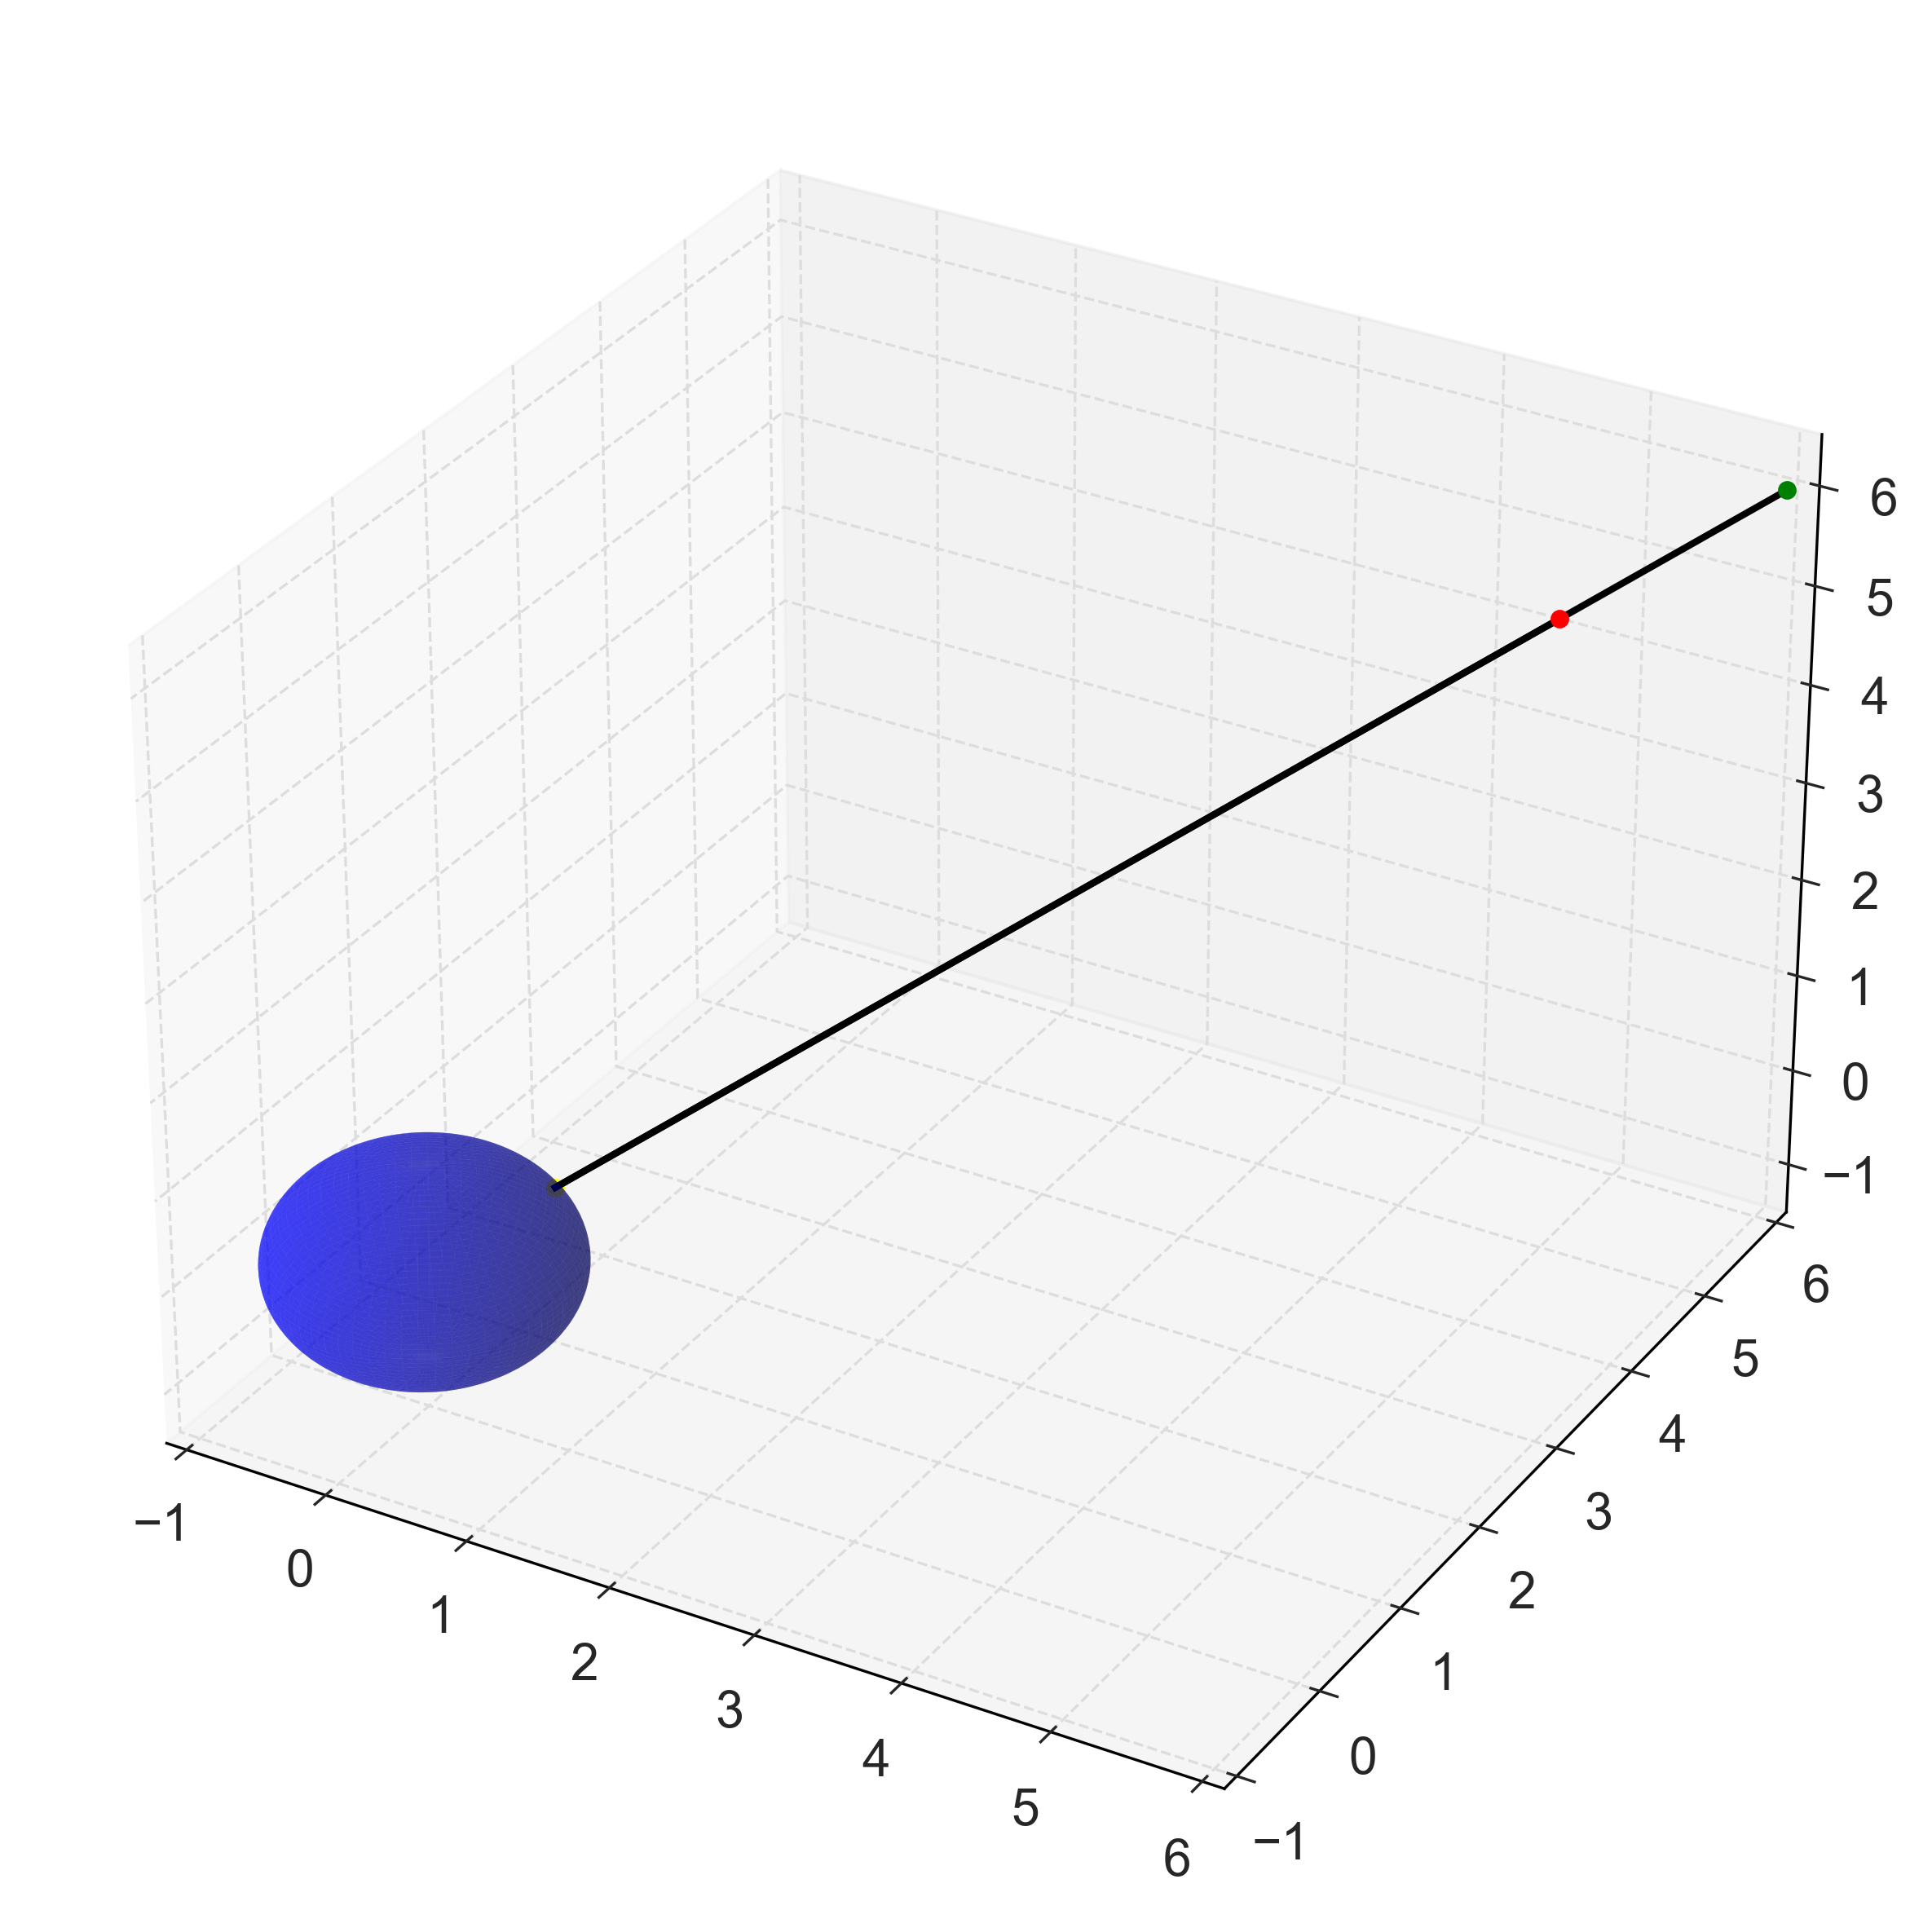

In [11]:
fig = plt.figure(figsize=(10,10), dpi=300)
ax = fig.add_subplot(111, projection='3d')

u = np.linspace(0, 2 * np.pi, 250)
v = np.linspace(0, np.pi, 250)

x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.5)

ax.plot([5,1.0/np.sqrt(3)], [5,1.0/np.sqrt(3)], [5,1.0/np.sqrt(3)], color="black");
ax.plot([6,1.0/np.sqrt(3)], [6,1.0/np.sqrt(3)], [6,1.0/np.sqrt(3)], color="black");

ax.scatter(5,5,5, color="red");
ax.scatter(1.0/np.sqrt(3),1.0/np.sqrt(3),1.0/np.sqrt(3), color="yellow", zorder=25);
ax.scatter(6,6,6, color="green");

## Problem 3: Calibration of the Nelson-Siegel-Svensson curve

__Note__: Exercise inspired somewhat by [M. Gilli, Stefan Große, E. Schumann (2010), "Calibrating the
Nelson–Siegel–Svensson model
"](https://comisef.eu/files/wps031.pdf)


[FRED](https://www.federalreserve.gov/data/nominal-yield-curve.htm) provides nominal yield curve data interpolated using the Nelson-Siegel-Svensson specificiation. It is assumed that the instantaneous forward rates are given by 

$$
f_t^T = \beta_0 + \beta_1 \exp \left(\frac{-(T-t)}{\tau_1}\right) + \beta_2 \frac{T-t}{\tau_1}\exp \left(\frac{-(T-t)}{\tau_1}\right) +  \beta_3 \frac{T-t}{\tau_2}\exp \left(\frac{-(T-t)}{\tau_2}\right)
$$

where $T-t$ is the time to maturity or tenor. The zero-coupon yield is then given by

$$
y_t^T = \frac{1}{T-t} \intop_t^T f_t^u du =  \beta_0 + \beta_1 \frac{1 - \exp\left(-\frac{T-t}{\tau_1} \right)}{\frac{T-t}{\tau_1}} + \beta_2 \left[ \frac{1 - \exp\left(-\frac{T-t}{\tau_1} \right)}{\frac{T-t}{\tau_1}}  - \exp\left(-\frac{T-t}{\tau_1} \right)\right] + \beta_3 \left[ \frac{1 - \exp\left(-\frac{T-t}{\tau_2} \right)}{\frac{T-t}{\tau_2}}  - \exp\left(-\frac{T-t}{\tau_2} \right)\right]
$$


__Question 1__

Define two Python functions `calculate_slope` and `calculate_curve`  as respectively

$$
\begin{align}
f_{slope}(T-t, \tau) &= \frac{1 - \exp\left(-\frac{T-t}{\tau} \right)}{\frac{T-t}{\tau}} \\
f_{curvature}(T-t, \tau) &= \left[ \frac{1 - \exp\left(-\frac{T-t}{\tau} \right)}{\frac{T-t}{\tau}}  - \exp\left(-\frac{T-t}{\tau} \right)\right]
\end{align}
$$

For $\tau = \tau_1$ from the FRED data set (use the date '2021-03-01') plot the level factor (just return one), the slope factor and the curvature factor for $T-t \in [0.001, 20.0]$. 

We should be able to see that the short rate is only governed by the first two factors (multiplied with the relevant $\beta$ coefficient). Other zero yields will be effected by the level factor and to some extent by the slope and the (two) curvature factors. 

__Question 2__

Define a function returning the zero yield for a given tenor. Plot the zero yields obtained using the function and the parameters for the date '2021-03-01' and the corresponding zero yields from the FRED data set. 

__Question 3__

We assume for a moment that we only observe the zero coupon yields for the FRED data set (or we have forgotten the specific parameter values).  We therefore want to calibrate the parameters. A natural approach would be to use [non-linear least squares](https://en.wikipedia.org/wiki/Non-linear_least_squares). To that end we define the quadratic objective function which we want to minimize

$$
g(\mathbf{y}; \theta) = \sum_{i=1}^n (y_i^{obs} - y_i^{model}(\theta))^2
$$
where $\theta = (\beta_0, \beta_1, \beta_2, \beta_3, \tau_1, \tau_2)^\top$. 

Define the quadratic objective function in Python and try to optimize it multiple times (e.g. 500) using `scipy.optimize.minimize`. Starting values can be selected randomly from the intervals $\beta_0 \in [0.0, 15.0]$, $\beta_1 \in [-15.0, 30.0]$, $\beta_2\in [-30.0, 30.0]$, $\beta_3\in [-30.0, 30.0]$, $\tau_1 \in (0.0, 30.0]$ and $\tau_2 \in (0.0, 30.0]$. Plot a histogram of the obtained estimates. 

It should be obvious that we will not converge to the true solution for all starting values!

__Question 4__

The problems with the optimization above is related to the objective function not being convex and exhibiting several local minima and the so-called [collinearity](https://en.wikipedia.org/wiki/Multicollinearity) problem. 

For given values of $\tau_1$ and $\tau_2$, then the minimization problem reduces to a ordinary least squares problem. Thus, defining the regressor matrix 

$$
\mathbf{X} = \begin{bmatrix} 1 & \frac{1 - \exp\left(-\frac{T_1-t}{\tau_1} \right)}{\frac{T_1-t}{\tau_1}} & \left[ \frac{1 - \exp\left(-\frac{T_1-t}{\tau_1} \right)}{\frac{T_1-t}{\tau_1}}  - \exp\left(-\frac{T_1-t}{\tau_1} \right)\right] & \left[ \frac{1 - \exp\left(-\frac{T_1-t}{\tau_2} \right)}{\frac{T_1-t}{\tau_2}}  - \exp\left(-\frac{T_1-t}{\tau_2} \right)\right] \\
\vdots & \vdots & \vdots & \vdots  \\
1 & \frac{1 - \exp\left(-\frac{T_n-t}{\tau_1} \right)}{\frac{T_n-t}{\tau_1}} & \left[ \frac{1 - \exp\left(-\frac{T_n-t}{\tau_1} \right)}{\frac{T_n-t}{\tau_1}}  - \exp\left(-\frac{T_n-t}{\tau_1} \right)\right] & \left[ \frac{1 - \exp\left(-\frac{T_n-t}{\tau_2} \right)}{\frac{T_1-t}{\tau_2}}  - \exp\left(-\frac{T_n-t}{\tau_2} \right)\right] 
\end{bmatrix}
$$

leads to the OLS estimates 

$$
 (\hat{\beta}_0, \hat{\beta}_1, \hat{\beta}_2, \hat{\beta}_3)^\top = (\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top\mathbf{y}
$$

As we have seen in previous exercises, in the case of highly correlated regressors $ (\mathbf{X}^\top\mathbf{X})^{-1}$ may or may not have an inverse. If it has, it will likely be "ill-conditioned" such _"that a given computer algorithm may or may not be able to compute an approximate inverse, and if it does so the resulting computed inverse may be highly sensitive to slight variations in the data (due to magnified effects of either rounding error or slight variations in the sampled data points) and so may be very inaccurate or very sample-dependent"_ ([Wikipedia](https://en.wikipedia.org/wiki/Multicollinearity)).

This will also lead to failure of many optimizers. One obvious case that cannot work is $\tau_1 = \tau_2$ since we will have two perfectly correlated regressors. 

1. For $\tau_1=2.0$ and $\tau_2 \in [2.0, 30.0]$ plot the correlation between the first and second curvature factor. 


2. For the true values of $\tau_1$ and $\tau_2$ estimate the other parameters using OLS. 

__Question 5__

The insight from question 4, have lead many to grid seach over $\tau_1$ and $\tau_2$ and estimate the other parameters using OLS. The final estimate is then the values that gives the lowest value of the objective function. 

Use `scipy.optimize.brute` to implement the grid search. 


__Question 6__

As an alternative, one could also try to directly use a global optimizer. Try to use e.g. `scipy.optimize.sgho` to solve the optimization problem directly on NLS objective function. 



### Solution 

__Question 1__

In [12]:
# get data frame with Nelson-Siegel-Svensson parameters
all_nss_parameters = get_nominal_yield_data(output_type='parameters')
nss_parameters = all_nss_parameters.loc['2021-03-01']

# define functions 
def calculate_slope(time_to_maturity: Union[float, np.ndarray], tau: float) -> Union[float, np.ndarray]: 
    
    return (1 - np.exp(-time_to_maturity / tau)) / (time_to_maturity / tau)

def calculate_curvature(time_to_maturity: Union[float, np.ndarray], tau: float) -> Union[float, np.ndarray]: 
    
    return (1 - np.exp(-time_to_maturity / tau)) / (time_to_maturity / tau) - np.exp(-(time_to_maturity / tau))

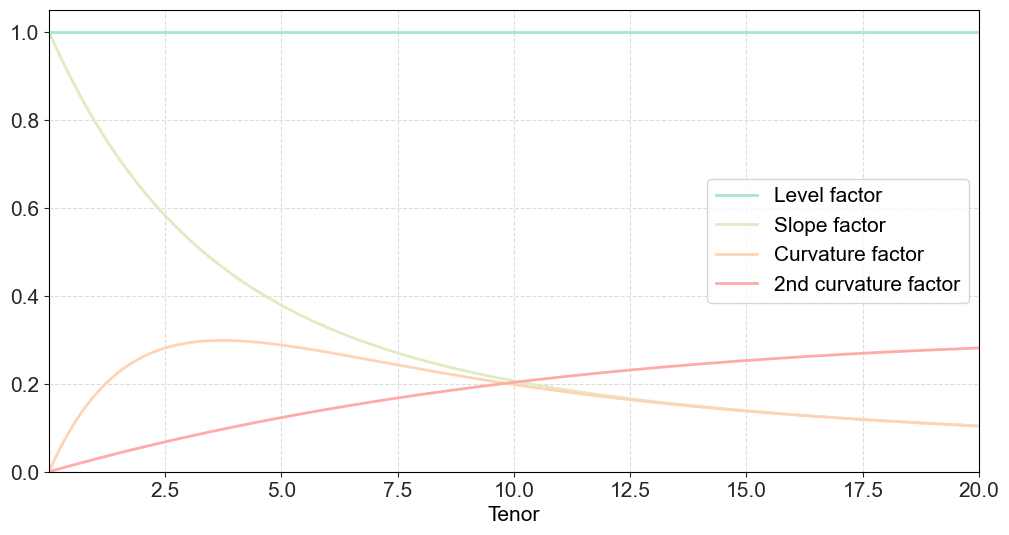

In [13]:
time_to_maturities = np.linspace(0.0001, 20.0, 1000)
tau1 = nss_parameters['TAU1']
tau2 = nss_parameters['TAU2']

level_factors = np.ones_like(time_to_maturities)
slope_factors = calculate_slope(time_to_maturities, tau1)
curvature_factors = calculate_curvature(time_to_maturities, tau1)
second_curvature_factors = calculate_curvature(time_to_maturities, tau2)

"""
Plotting 
"""

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(time_to_maturities, level_factors, label="Level factor")
ax.plot(time_to_maturities, slope_factors, label="Slope factor")
ax.plot(time_to_maturities, curvature_factors, label="Curvature factor")
ax.plot(time_to_maturities, second_curvature_factors, label="2nd curvature factor")
ax.set_xlabel('Tenor')
ax.set_ylim([0.0, 1.05])
ax.legend();

__Question 2__


In [14]:
def calculate_nss_zero_yields(time_to_maturity: Union[float, np.ndarray], params: Union[np.ndarray, List]) -> Union[float, np.ndarray]: 
    
    beta0 = params[0]
    beta1 = params[1]
    beta2 = params[2]
    beta3 = params[3]
    tau1 = params[4]
    tau2 = params[5]
    
    s = calculate_slope(time_to_maturity, tau1)
    c1 = calculate_curvature(time_to_maturity, tau1)
    c2 = calculate_curvature(time_to_maturity, tau2)
        
    return beta0 + beta1 * s + beta2 * c1 + beta3 * c2

In [15]:
# get data frame with Nelson-Siegel-Svensson parameters
all_nss_yields = get_nominal_yield_data(output_type='zero_yields')
nss_yields = all_nss_yields.loc['2021-03-01'].values
nss_tenors = np.arange(1.0, 31.0, 1.0)

# calculate yields
nss_yields_calc = calculate_nss_zero_yields(nss_tenors, nss_parameters.values)

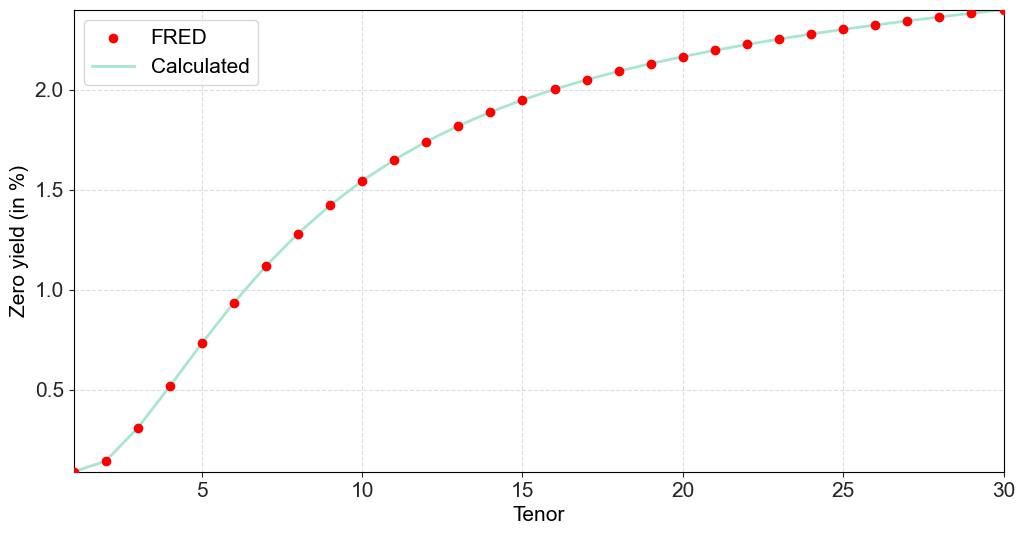

In [16]:
"""
Plotting 
"""

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(nss_tenors, nss_yields, label="FRED", color="red", zorder=3)
ax.plot(nss_tenors, nss_yields_calc, label="Calculated")
ax.set_xlabel('Tenor')
ax.set_ylabel('Zero yield (in %)')
ax.legend();

__Question 3__



In [17]:
# quadratic objective function 
def quad_objective(params: np.ndarray, tenors: np.ndarray, observed_yields: np.ndarray): 
    
    model_yields = calculate_nss_zero_yields(tenors, params)
    
    return np.sum(np.square(observed_yields - model_yields))

In [18]:
# evaluated at True parameters
quad_objective(nss_parameters.values, nss_tenors, nss_yields)

2.6404764813101768e-08

In [19]:
# true parameter values
nss_parameters

BETA0     3.319355
BETA1    -3.044078
BETA2    -4.408990
BETA3    -1.352546
TAU1      2.079503
TAU2     16.663662
Name: 2021-03-01 00:00:00, dtype: float64

In [20]:
bounds = ((-np.inf, np.inf), (-np.inf, np.inf), (-np.inf, np.inf), (-np.inf, np.inf),
          (0.001, np.inf), (0.001, np.inf))

bounds = ((0.0, 15.0), (-15.0, 30.0), (-30.0, 30.0), (-30.0, 30.0),
          (0.001, 30.0), (0.001, 30.0))

# guessing on starting values - try som different
num_random = 500
beta0_vals = np.random.uniform(low=0, high=15.0, size=num_random)
beta1_vals = np.random.uniform(low=-15.0, high=30.0, size=num_random)
beta2_vals = np.random.uniform(low=-30.0, high=30.0, size=num_random)
beta3_vals = np.random.uniform(low=-30.0, high=30.0, size=num_random)
tau1_vals = np.random.uniform(low=0.01, high=30.0, size=num_random)
tau2_vals = np.random.uniform(low=0.01, high=30.0, size=num_random)

random_params = np.array((beta0_vals, beta1_vals, beta2_vals, beta3_vals, tau1_vals, tau2_vals))

est_params = list()
for i in range(num_random): 
    res = optimize.minimize(quad_objective, args=(nss_tenors, nss_yields), x0=random_params[:, i], bounds=bounds)
    
    est_params.append(res.x)
    
est_params = np.array(est_params)

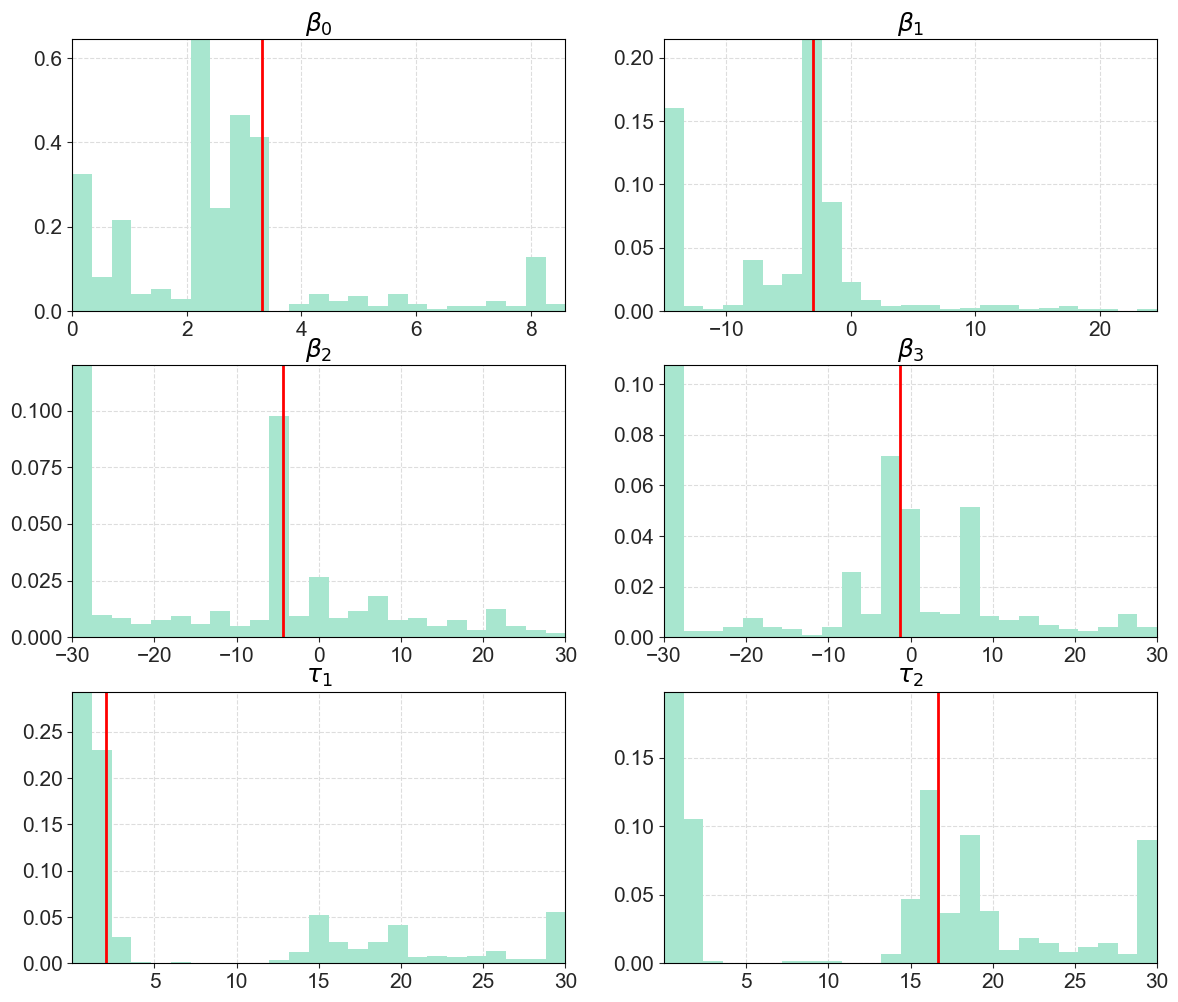

In [21]:
plot_names = ['$\\beta_0$', '$\\beta_1$', '$\\beta_2$', '$\\beta_3$', '$\\tau_1$', '$\\tau_2$']
fig, ax = plt.subplots(3, 2, figsize=(14, 12))
ax = ax.flatten()

for i in range(6): 
    
    ax[i].hist(est_params[:, i], bins=25, density=True)
    ax[i].set_title(plot_names[i])
    ax[i].axvline(x=nss_parameters.values[i], color="red")

__Question 4__

In [22]:
tau2_to_use = np.linspace(2.0, 30.0, 1000)
first_curvature_factor = calculate_curvature(nss_tenors, 2.0)

correlations = np.array([np.corrcoef(first_curvature_factor, calculate_curvature(nss_tenors, t))[0, 1]
                         for t in tau2_to_use])

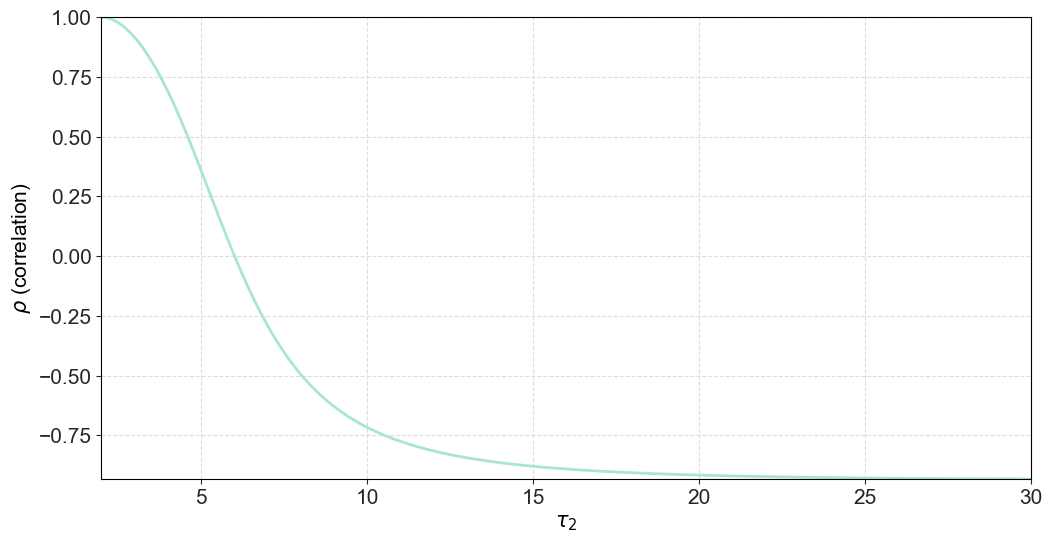

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(tau2_to_use, correlations)
ax.set_xlabel('$\\tau_2$')
ax.set_ylabel('$\\rho$ (correlation)'); 

In [24]:
nss_parameters

BETA0     3.319355
BETA1    -3.044078
BETA2    -4.408990
BETA3    -1.352546
TAU1      2.079503
TAU2     16.663662
Name: 2021-03-01 00:00:00, dtype: float64

In [25]:
"""
OLS estimation 
"""

X = np.c_[np.ones_like(nss_tenors),
          calculate_slope(nss_tenors, nss_parameters['TAU1']), 
          calculate_curvature(nss_tenors, nss_parameters['TAU1']),
          calculate_curvature(nss_tenors, nss_parameters['TAU2'])]

est_params = np.linalg.lstsq(X, nss_yields, rcond=None)
est_params

(array([ 3.31867029, -3.043471  , -4.40824409, -1.3506067 ]),
 array([2.38190083e-08]),
 4,
 array([5.79574361, 1.1021166 , 0.26851008, 0.01848762]))

In [26]:
"""
OLS with slightly different taus -> somewhat different estimates, very sensitive
"""

X = np.c_[np.ones_like(nss_tenors),
          calculate_slope(nss_tenors, nss_parameters['TAU1'] + 0.1), 
          calculate_curvature(nss_tenors, nss_parameters['TAU1'] + 0.1),
          calculate_curvature(nss_tenors, nss_parameters['TAU2'] + 0.1)]

est_params = np.linalg.lstsq(X, nss_yields, rcond=None)
est_params

(array([ 3.80883077, -3.56593857, -4.63267348, -2.6912822 ]),
 array([0.00045062]),
 4,
 array([5.80707937, 1.11062559, 0.27319808, 0.01673655]))

__Question 5__

In [27]:
def ols_nss(taus: np.ndarray,  tenors: np.ndarray, observed_yields: np.ndarray):   
    
    tau1 = taus[0]
    tau2 = taus[1]
    
    X = np.c_[np.ones_like(tenors),
              calculate_slope(tenors, tau1), 
              calculate_curvature(tenors, tau1),
              calculate_curvature(tenors, tau2)]

    est_params = np.linalg.lstsq(X, observed_yields, rcond=None)
    
    return est_params[0]


def ols_quad_objective(taus: np.ndarray,  tenors: np.ndarray, observed_yields: np.ndarray): 

    est_params = ols_nss(taus,  tenors, observed_yields)
    
    new_params = np.r_[est_params, taus]
    
    return quad_objective(new_params, tenors, observed_yields)

In [28]:
res = optimize.brute(ols_quad_objective, (slice(0.001, 5.0), slice(5.0, 30.0)), args=(nss_tenors, nss_yields), Ns=99999)
est_params = np.r_[ols_nss(res,  nss_tenors, nss_yields), res]
est_params

array([ 3.32021944, -3.04513357, -4.4090073 , -1.35483913,  2.07993536,
       16.67124499])

In [29]:
quad_objective(est_params, nss_tenors, nss_yields)

2.277501148910011e-08

__Question 6__

In [30]:
bounds = ((0.0, 15.0), (-15.0, 30.0), (-30.0, 30.0), (-30.0, 30.0),
          (0.001, 5.0), (2.0, 30.0))
optimize.dual_annealing(quad_objective,  args=(nss_tenors, nss_yields), bounds=bounds, maxiter=999)

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: 1.3925298991290223e-06
       x: [ 3.319e+00 -3.043e+00 -4.414e+00 -1.354e+00  2.077e+00
            1.659e+01]
     nit: 999
    nfev: 12794
    njev: 115
    nhev: 0

In [31]:
optimize.shgo(quad_objective, args=(nss_tenors, nss_yields),
              bounds=bounds,
              n=200,
              sampling_method='sobol')

C:\Users\johan\anaconda3\envs\fin_econ_2024\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


 message: Optimization terminated successfully.
 success: True
     fun: 2.2832681973889185e-08
    funl: [ 2.283e-08  2.285e-08  2.285e-08  1.594e-04  1.670e-04]
       x: [ 3.320e+00 -3.045e+00 -4.409e+00 -1.354e+00  2.080e+00
            1.667e+01]
      xl: [[ 3.320e+00 -3.045e+00 ...  2.080e+00  1.667e+01]
           [ 3.320e+00 -3.045e+00 ...  2.080e+00  1.667e+01]
           ...
           [ 2.708e+00 -2.404e+00 ...  1.936e+00  3.000e+01]
           [ 2.737e+00 -2.438e+00 ...  1.953e+00  3.000e+01]]
     nit: 1
    nfev: 2718
   nlfev: 2494
   nljev: 348
   nlhev: 0

### Some extra stuff

In [32]:
"""
Plot countour plot beta0 vs tau2
"""
test_params = np.array([2.05, -1.82, -2.03, 8.25, 0.87, 14.38])
plot_quad_obj_beta0_tau2 = lambda x : quad_objective(np.r_[x[0], nss_parameters.values[1:-1], x[1]],
                                                     nss_tenors, nss_yields)

beta0 = np.linspace(-5.0, 15, 999)
tau2 = np.linspace(0.0001, 30, 999)
beta0grid, tau2grid = np.meshgrid(beta0, tau2)
inputs = np.stack([beta0grid, tau2grid])
quad_values = np.apply_along_axis(plot_quad_obj_beta0_tau2, 0, inputs)

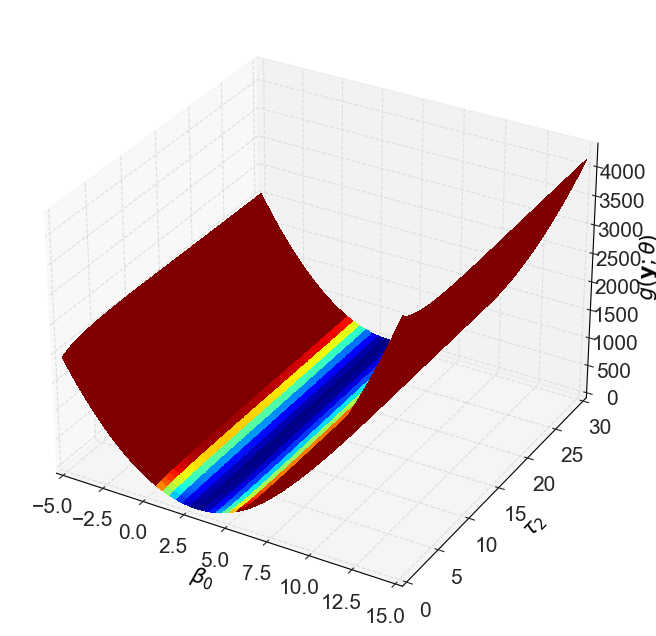

In [33]:
# Initialize figure 
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection = '3d')

# Plot the surface
surf = ax.plot_surface(beta0grid, tau2grid, quad_values, cmap=cm.jet, linewidth=0, antialiased=False,
                       vmin=0.0, vmax=200)

ax.set_xlabel('$\\beta_0$')
ax.set_ylabel('$\\tau_2$')
ax.set_zlabel('$g(\mathbf{y}; \\theta)$');

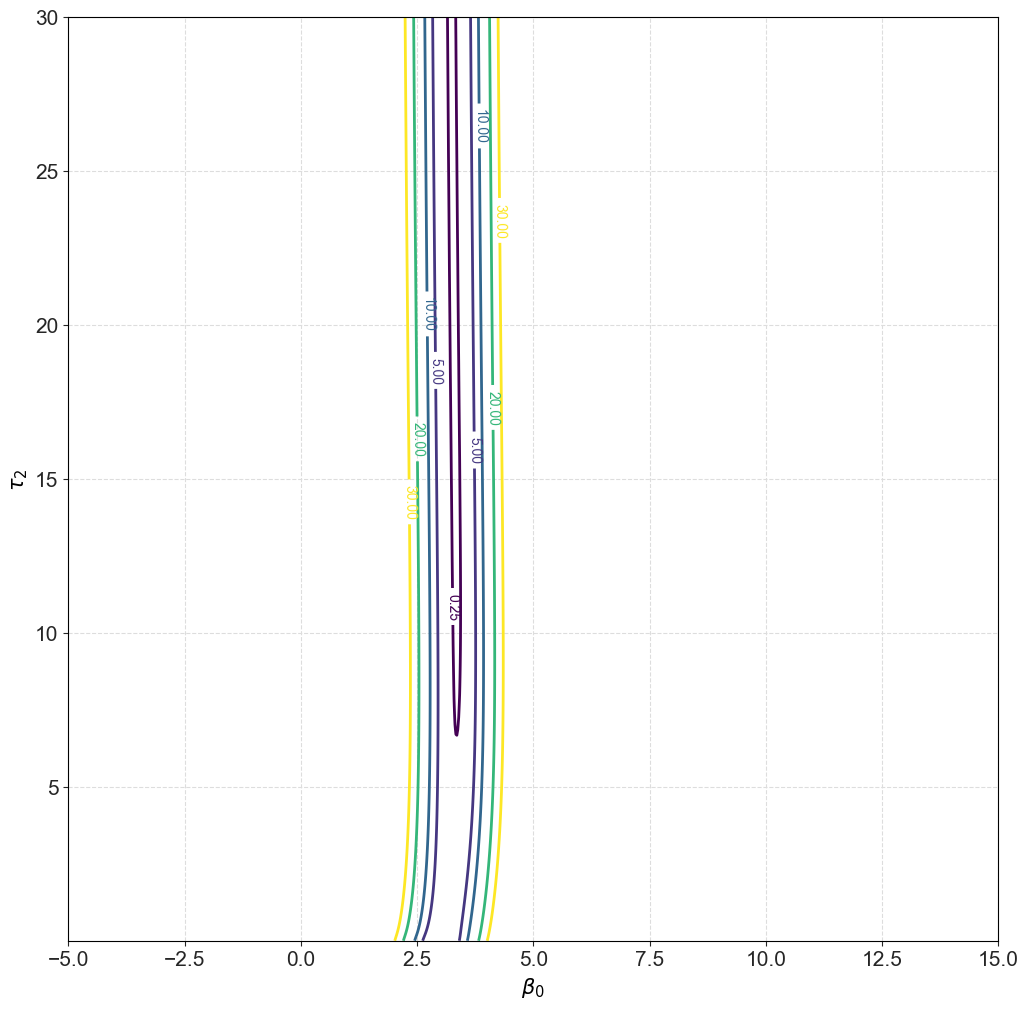

In [34]:
fig, ax = plt.subplots(figsize=(12, 12))
cs = ax.contour(beta0grid, tau2grid, quad_values, levels=[0.25, 5.0, 10.0, 20.0, 30])
ax.set_xlabel('$\\beta_0$')
ax.set_ylabel('$\\tau_2$')
ax.clabel(cs, inline=True, fontsize=10);

### Problem 4: Portfolio optimization with constraints

One way to cast the investor's one period portfolio optimization problem (in a Markowitz framework) is to minimize the portfolio variance $\text{Var}[R_p]$

$$
\underset{\mathbf{w}}{\text{arg min}} \text{Var}[R_p] = \mathbf{w}^\top \boldsymbol{\Sigma} \mathbf{w}
$$

subject to meeting the target return $p$

$$
\mathbf{w}^\top \boldsymbol{\mu} = p
$$

We also want the portfolio weights to sum to one and not allow for short-selling

$$
\begin{align}
\mathbf{w}^\top \mathbf{1} &= 1 \\
w_i &\geq 0, \; i=1,2, ..., N
\end{align}
$$

__Question 1__

Obtain the value weighted monthly return data for the Fama-French industry portfolios ("12_Industry_Portfolios") using `pandas-datareader` since 1999-01-01. Calculate the expected monthly mean return and covariance matrix. 


__Question 2__

Solve the previously defined optimization problem using the estimates from question 1. Consider different relevant target values for $p$ (expected monthly return). 

__Question 3__

Plot the optimal allocation and the efficient frontier in two seperat figures. 

__Question 4__

Repeat the calculations in the two previous questions when allocation to a particular index is restricted to be no more than 30%. 


### Solution

__Question 1__

In [35]:
#get_available_datasets()

In [36]:
reader = FamaFrenchReader("12_Industry_Portfolios",
                          start=datetime.datetime(1999, 1, 1))
industry_port = reader.read()

# print description
industry_port['DESCR']

C:\Users\johan\AppData\Local\Temp\ipykernel_44124\3891303947.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industry_port = reader.read()
C:\Users\johan\AppData\Local\Temp\ipykernel_44124\3891303947.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industry_port = reader.read()
C:\Users\johan\AppData\Local\Temp\ipykernel_44124\3891303947.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industry_port = reader.read()
C:\Users\johan\AppData\Local\Temp\ipykernel_44124\3891303947.py:3: FutureWarning: The argument 'date_parse

'12 Industry Portfolios\n----------------------\n\nThis file was created by CMPT_IND_RETS using the 202408 CRSP database. It contains value- and equal-weighted returns for 12 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2024 Kenneth R. French\n\n  0 : Average Value Weighted Returns -- Monthly (308 rows x 12 cols)\n  1 : Average Equal Weighted Returns -- Monthly (308 rows x 12 cols)\n  2 : Average Value Weighted Returns -- Annual (25 rows x 12 cols)\n  3 : Average Equal Weighted Returns -- Annual (25 rows x 12 cols)\n  4 : Number of Firms in Portfolios (308 rows x 12 cols)\n  5 : Average Firm Size (308 rows x 12 cols)\n  6 : Sum of BE / Sum of ME (26 rows x 12 cols)\n  7 : Value-Weighted Average of BE/ME (26 rows x 12 cols)'

In [37]:
# get equally weighted
ind_eq_weighted = industry_port[1] / 100

# get market cap weighted 
ind_mc_weighted = industry_port[0] / 100

# asset list
asset_list = ind_mc_weighted.columns

In [38]:
mu_est  = ind_mc_weighted.mean().values
cor_mat_est = ind_mc_weighted.corr().values
vol_est = ind_mc_weighted.std().values
cov_mat_est = np.outer(vol_est, vol_est) * cor_mat_est

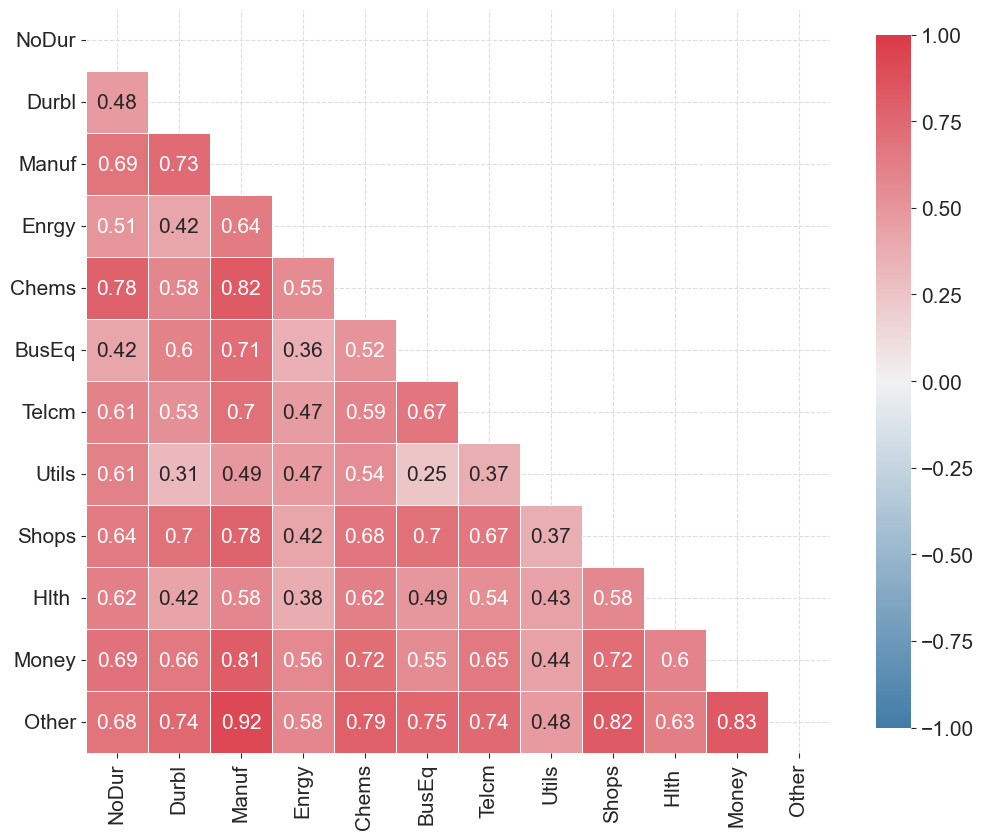

In [39]:
fig, ax = plt.subplots(figsize=(12, 12))
correlation_plot(cor_mat_est, names=asset_list, include_values=True, ax=ax)

__Question 2__

In [40]:
max_exp_ret = max(mu_est)
min_exp_ret = min(mu_est)

In [41]:
# define objective function 
def portfolio_variance(w: np.ndarray, cov_mat: np.ndarray): 
    return w @ cov_mat @ w

# define common constraints 
sum_to_one_cons = {'type': 'eq',
                   'fun' : lambda x: np.sum(x) - 1.0, 
                   'jac' : lambda x: np.ones_like(x)}

no_short_cons = {'type': 'ineq',
                 'fun' : lambda x: x,
                 'jac' : lambda x: np.eye(len(x))}

# alternatively use 
bounds = [(0.0, 1.0)] * len(mu_est)

# define constraint 
target_cons = {'type': 'eq',
               'fun' : lambda x: x @ mu_est - max_exp_ret,
               'jac' : lambda x: mu_est}

port_var_der = lambda w, cov_mat: 2 * w @ cov_mat


x0 = np.ones_like(mu_est) / len(mu_est)
res = optimize.minimize(portfolio_variance, x0=x0, args=(cov_mat_est,),
                        method='SLSQP',
                        jac=port_var_der,
                        constraints=[sum_to_one_cons,
                                     no_short_cons, 
                                     target_cons],  # no_short_cons,
                        options={'ftol': 1e-9, 'disp': True}) #, bounds=bounds)

res

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.004811850780807148
            Iterations: 2
            Function evaluations: 2
            Gradient evaluations: 2


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.004811850780807148
       x: [-1.416e-15 -8.188e-16 -7.092e-15  2.012e-15  3.400e-15
            1.000e+00 -2.290e-15 -8.465e-16 -1.124e-15 -5.412e-16
            8.743e-16  3.789e-15]
     nit: 2
     jac: [ 2.123e-03  7.651e-03  5.738e-03  3.545e-03  3.071e-03
            9.624e-03  4.959e-03  1.475e-03  4.518e-03  2.838e-03
            4.382e-03  5.408e-03]
    nfev: 2
    njev: 2

In [42]:
"""
Loop over different target expected return 
"""

x0 = np.ones_like(mu_est) / len(mu_est)
port_weights = list()
mu_targets = np.arange(min_exp_ret, max_exp_ret, 0.0001)
for p in mu_targets:
    
    # define constraint 
    target_cons = {'type': 'eq',
                   'fun' : lambda x: x @ mu_est - p,
                   'jac' : lambda x: mu_est}
    
    res = optimize.minimize(portfolio_variance, x0=x0, args=(cov_mat_est,),
                            method='SLSQP',
                            jac=port_var_der,
                            constraints=[sum_to_one_cons, target_cons],
                            options={'ftol': 1e-9, 'disp': False},bounds=bounds)
    
    port_weights.append(res.x)
    
port_weights = np.array(port_weights) * 100

In [43]:
#port_weights
#mu_targets

__Question 3__

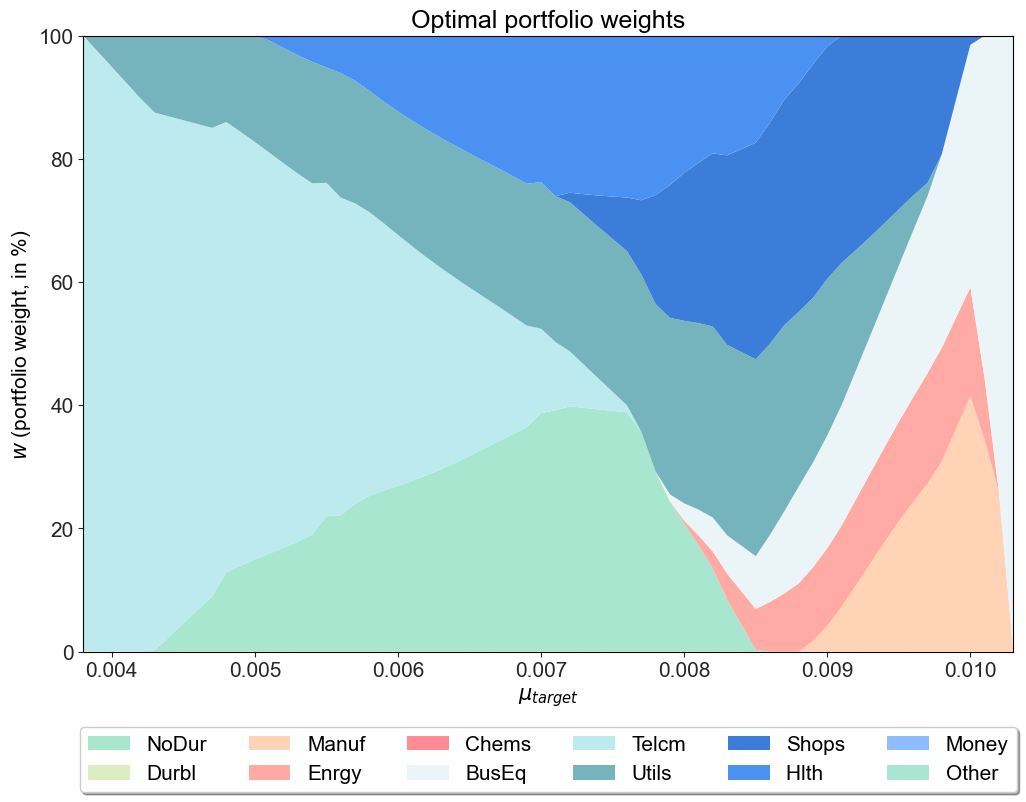

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.stackplot(mu_targets, port_weights.T, labels=asset_list);
ax.set_xlabel('$\\mu_{target}$')
ax.set_ylabel('$w$ (portfolio weight, in %)');
ax.set_title('Optimal portfolio weights');
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.175),
          fancybox=True, shadow=True, ncol=6);

In [45]:
port_weights.shape

(66, 12)

(0.0028006493506493504, 0.011300974025974027)

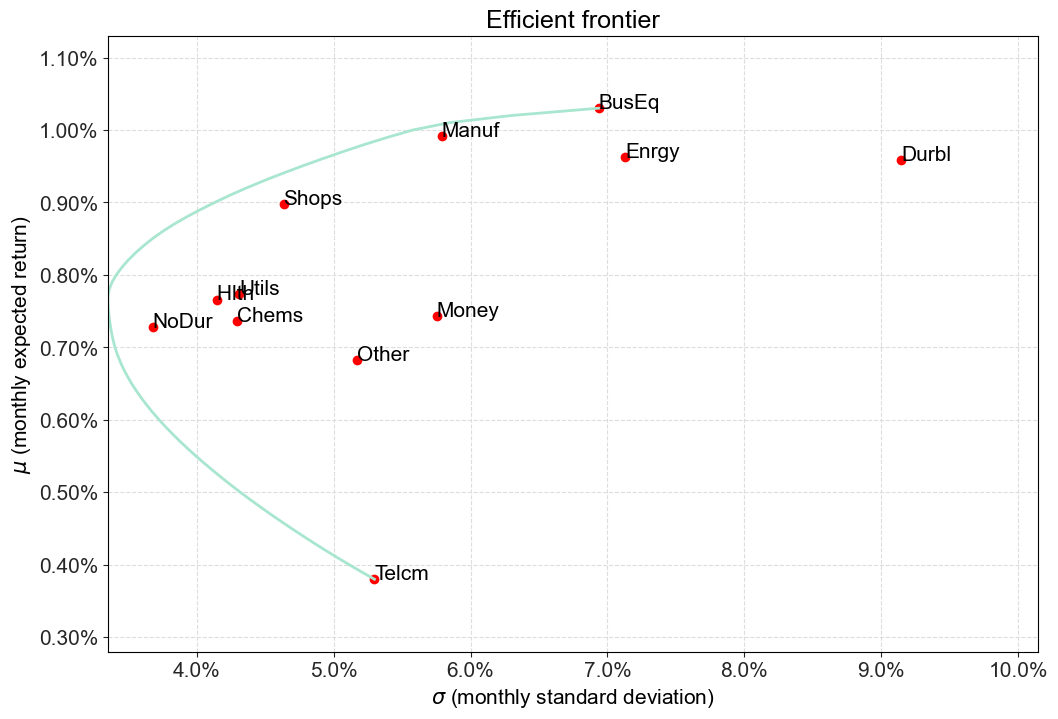

In [46]:
all_port_std = np.sqrt(np.apply_along_axis(portfolio_variance, 1,
                                           port_weights / 100, cov_mat_est))
all_mu = port_weights @ mu_est / 100.0


fig, ax = plt.subplots(figsize=(12,8))

ax.plot(all_port_std, all_mu, label='Efficient frontier')
ax.scatter(vol_est, mu_est, color="red", label="Individual assets"); 
ax.set_title('Efficient frontier'); 

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1)) 
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1)) 

ax.set_xlabel('$\\sigma$ (monthly standard deviation)')
ax.set_ylabel('$\\mu$ (monthly expected return)'); 

# add asset names
for i, xy in enumerate(zip(vol_est, mu_est)):
    ax.annotate(asset_list[i], xy)
    
# fix axes
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1] + 0.01])
ax.set_ylim([ax.get_ylim()[0] - 0.001, ax.get_ylim()[1] + 0.001])

__Question  4__

In [47]:
bounds = [(0.0, 0.3)] * len(mu_est) # implement constraint
x0 = np.ones_like(mu_est) / len(mu_est)
port_weights = list()
mu_targets = np.arange(min_exp_ret + 0.003, max_exp_ret - 0.0005, 0.0001)
for p in mu_targets:
    
    # define constraint 
    target_cons = {'type': 'eq',
               'fun' : lambda x: x @ mu_est - p,
               'jac' : lambda x: mu_est}
    
    res = optimize.minimize(portfolio_variance, x0=x0, args=(cov_mat_est,),
                            method='SLSQP',
                            jac=port_var_der,
                            constraints=[sum_to_one_cons, target_cons],
                            options={'ftol': 1e-9, 'disp': False}, bounds=bounds)
    
    port_weights.append(res.x)
    
port_weights = np.array(port_weights) * 100

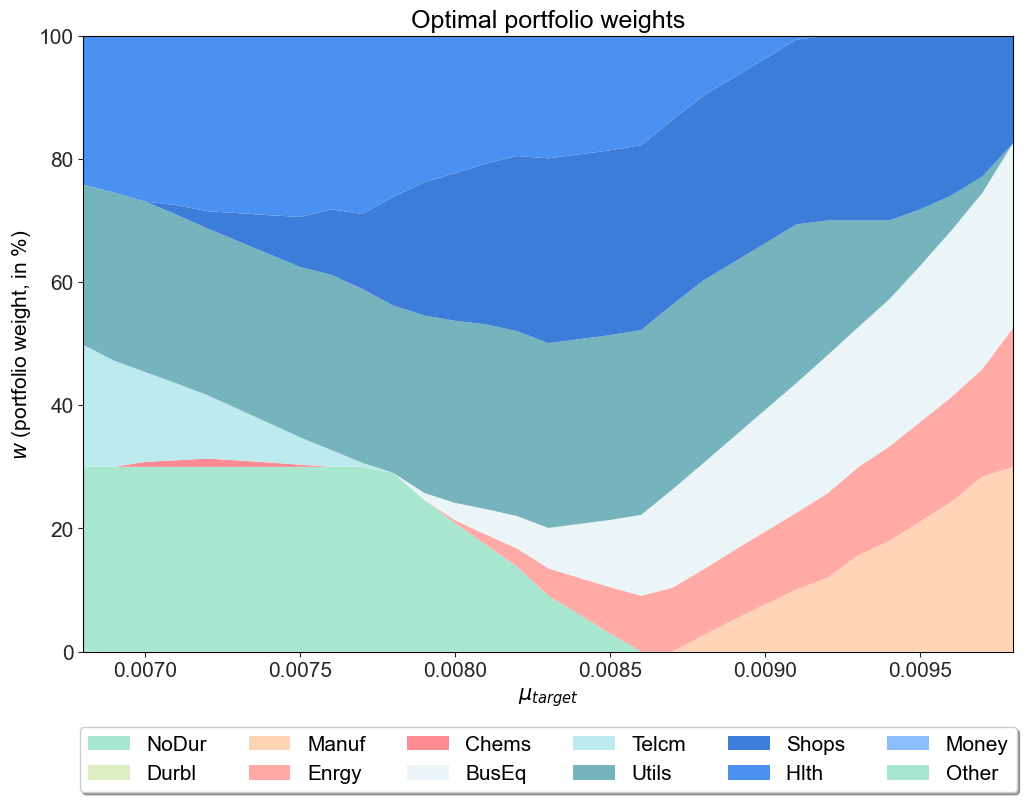

In [48]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.stackplot(mu_targets, port_weights.T, labels=asset_list);
ax.set_xlabel('$\\mu_{target}$')
ax.set_ylabel('$w$ (portfolio weight, in %)');
ax.set_title('Optimal portfolio weights');
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.175),
          fancybox=True, shadow=True, ncol=6);

(0.0028006493506493504, 0.011300974025974027)

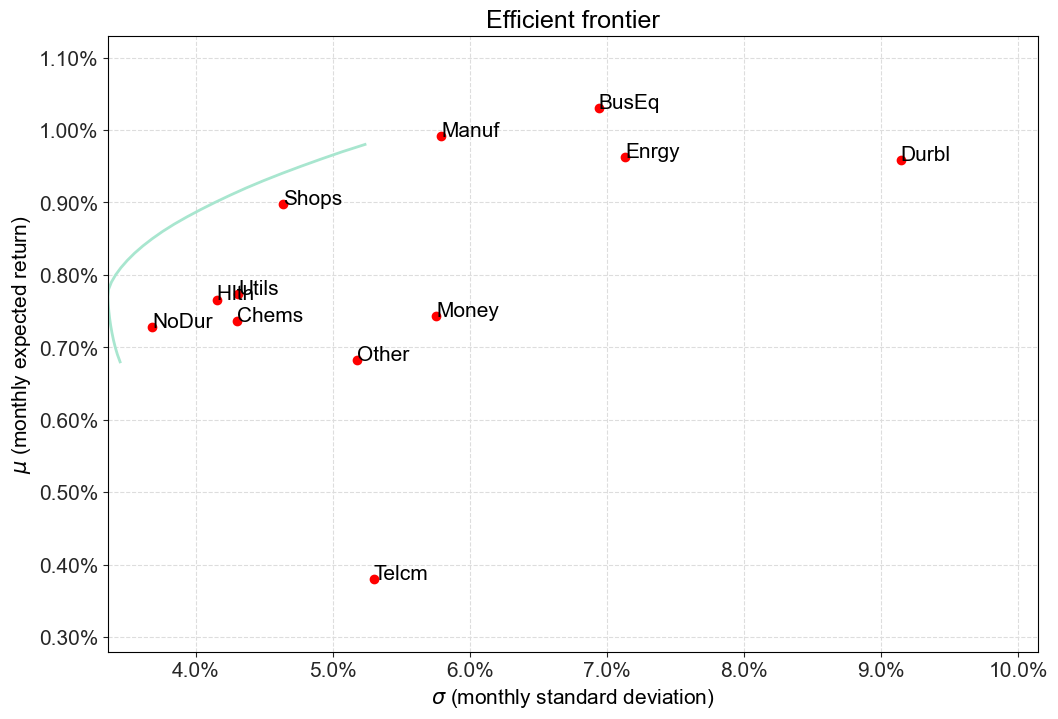

In [49]:
all_port_std = np.sqrt(np.apply_along_axis(portfolio_variance, 1, port_weights / 100, cov_mat_est))
all_mu = port_weights @ mu_est / 100.0


fig, ax = plt.subplots(figsize=(12,8))

ax.plot(all_port_std, all_mu, label='Efficient frontier')
ax.scatter(vol_est, mu_est, color="red", label="Individual assets"); 
ax.set_title('Efficient frontier'); 

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1)) 
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1)) 

ax.set_xlabel('$\\sigma$ (monthly standard deviation)')
ax.set_ylabel('$\\mu$ (monthly expected return)'); 


# add asset names
for i, xy in enumerate(zip(vol_est, mu_est)):
    ax.annotate(asset_list[i], xy)
    
# fix axes
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1] + 0.01])
ax.set_ylim([ax.get_ylim()[0] - 0.001, ax.get_ylim()[1] + 0.001])

## Problem 5:  Minimizing CVaR (and VaR)

We now assume that an investor's one period portfolio optimization problem is to minimize the portfolio $\text{CVaR}_\beta[R_p]$

$$
\underset{\mathbf{w}}{\text{arg min }}  \text{CVaR}_\beta[R_p]
$$

subject to meeting the target return $p$

$$
\mathbf{w}^\top \boldsymbol{\mu} = p
$$

We also want the portfolio weights to sum to one and not allow for short-selling

$$
\begin{align}
\mathbf{w}^\top \mathbf{1} &= 1 \\
w_i &\geq 0, \; i=1,2, ..., N
\end{align}
$$


__Question 1__

Implement the Mean-CVaR optimization problem using the same data set as in the previous problem for some target return. Let $\beta = 0.95$ (95% CVaR). 


__Question 2__

Consider different relevant target values for $p$ (expected monthly return). 

Plot the optimal allocations and the efficient frontier.  

### Solution

__Question 1__

In [50]:
reader = FamaFrenchReader("12_Industry_Portfolios", start=datetime.datetime(1999, 1, 1))
industry_port = reader.read()

# print description
industry_port['DESCR']

# get equally weighted
ind_eq_weighted = industry_port[1] / 100

# get market cap weighted 
ind_mc_weighted = industry_port[0] / 100

# asset list
asset_list = ind_mc_weighted.columns

C:\Users\johan\AppData\Local\Temp\ipykernel_44124\1767258485.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industry_port = reader.read()
C:\Users\johan\AppData\Local\Temp\ipykernel_44124\1767258485.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industry_port = reader.read()
C:\Users\johan\AppData\Local\Temp\ipykernel_44124\1767258485.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industry_port = reader.read()
C:\Users\johan\AppData\Local\Temp\ipykernel_44124\1767258485.py:2: FutureWarning: The argument 'date_parse

In [51]:
mu_est  = ind_mc_weighted.mean().values
cor_mat_est = ind_mc_weighted.corr().values
vol_est = ind_mc_weighted.std().values
cov_mat_est = np.outer(vol_est, vol_est)*cor_mat_est

In [52]:
def calculate_cvar(w: np.ndarray, returns: np.ndarray, beta: float = 0.95): 
    
    # portfolio returns
    port_returns = returns @ w 
    
    # percentile
    perc = np.percentile(port_returns, (1 - beta)*100)
    
    # average in tail
    avg_tail = np.mean(port_returns[port_returns <= perc])
    
    return -avg_tail

In [53]:
# define common constraints 
sum_to_one_cons = {'type': 'eq',
                   'fun' : lambda x: np.sum(x) - 1.0}

no_short_cons = {'type': 'ineq',
                 'fun' : lambda x: x}

# alternatively use 
bounds = [(0.0, 1.0)] * len(mu_est)

# define constraint 
target_cons = {'type': 'eq',
               'fun' : lambda x: x @ mu_est - 0.009}


x0 = np.ones_like(mu_est) / len(mu_est)
res1 = optimize.minimize(calculate_cvar, x0=x0, args=(ind_mc_weighted.values, 0.95),
                        method='SLSQP',
                        constraints=[sum_to_one_cons,  target_cons], 
                        options={'ftol': 1e-9, 'disp': True}, bounds=bounds)

res1

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.08658125274699835
            Iterations: 22
            Function evaluations: 319
            Gradient evaluations: 22


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.08658125274699835
       x: [ 1.197e-17  6.811e-17  6.782e-03  9.368e-02  5.939e-17
            1.696e-01  3.699e-21  6.783e-21  5.277e-01  2.022e-01
            7.136e-21  4.192e-17]
     nit: 22
     jac: [ 4.973e-02  1.223e-01  1.114e-01  1.036e-01  6.434e-02
            1.236e-01  8.489e-02  5.931e-02  8.609e-02  4.812e-02
            9.523e-02  9.749e-02]
    nfev: 319
    njev: 22

__Question 2__

In [54]:
max_exp_ret = max(mu_est)
min_exp_ret = min(mu_est)
x0 = np.r_[np.ones_like(mu_est) / len(mu_est)]
port_weights = list()
mu_targets = np.arange(min_exp_ret + 0.003, max_exp_ret - 0.0005, 0.0001)
for p in mu_targets:
    
    # define constraint 
    target_cons = {'type': 'eq',
                   'fun' : lambda x: x @ mu_est - p}
    
    res = optimize.minimize(calculate_cvar, x0=x0, args=(ind_mc_weighted.values, 0.95),
                        method='SLSQP',
                        constraints=[sum_to_one_cons,  target_cons], 
                        options={'ftol': 1e-12, 'disp': True, 'maxiter': 1000, 'eps': 1e-12}, bounds=bounds)
    
    port_weights.append(res.x)
    
port_weights = np.array(port_weights)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.07377583110189279
            Iterations: 22
            Function evaluations: 299
            Gradient evaluations: 22
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.07306832873399896
            Iterations: 32
            Function evaluations: 476
            Gradient evaluations: 32
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.07249129913810926
            Iterations: 54
            Function evaluations: 789
            Gradient evaluations: 54
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.07211473660229661
            Iterations: 69
            Function evaluations: 1053
            Gradient evaluations: 69
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.07173817243238476
            Iterations: 87
            Fu

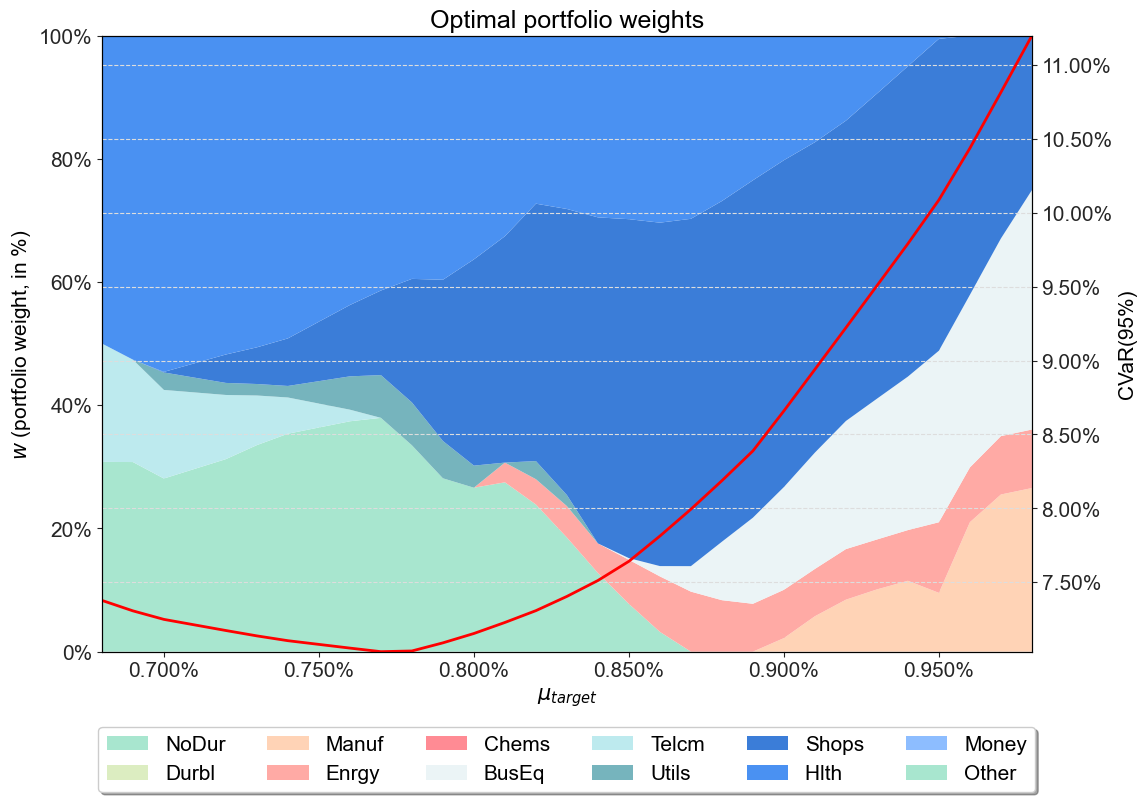

In [55]:
"""
Plotting
"""

fig, ax = plt.subplots(figsize=(12, 8))

ax.stackplot(mu_targets, port_weights.T, labels=asset_list);
ax.set_xlabel('$\\mu_{target}$')
ax.set_ylabel('$w$ (portfolio weight, in %)');
ax.set_title('Optimal portfolio weights');
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.175),
          fancybox=True, shadow=True, ncol=6);
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1)) 


all_port_cvar = np.apply_along_axis(calculate_cvar, 1, port_weights , ind_mc_weighted.values, 0.95)
all_mu = port_weights @ mu_est 

ax_new = ax.twinx()
ax_new.plot(all_mu, all_port_cvar,  color="red")

ax_new.yaxis.set_major_formatter(mtick.PercentFormatter(1)) 
ax_new.xaxis.set_major_formatter(mtick.PercentFormatter(1)) 
ax_new.set_ylabel('CVaR(95%)');

# References


## Articles

[Svensson (1994)](https://www.nber.org/papers/w4871)

[Rockafeller and Uryasev (2000)](https://www.ise.ufl.edu/uryasev/files/2011/11/CVaR1_JOR.pdf)

## Books